# OOD Visualisation

In [59]:
import numpy as np
import matplotlib.pyplot as pyplt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

adult
aloi
california_housing
covtype
epsilon
helena
higgs_small
jannis
microsoft
yahoo
year


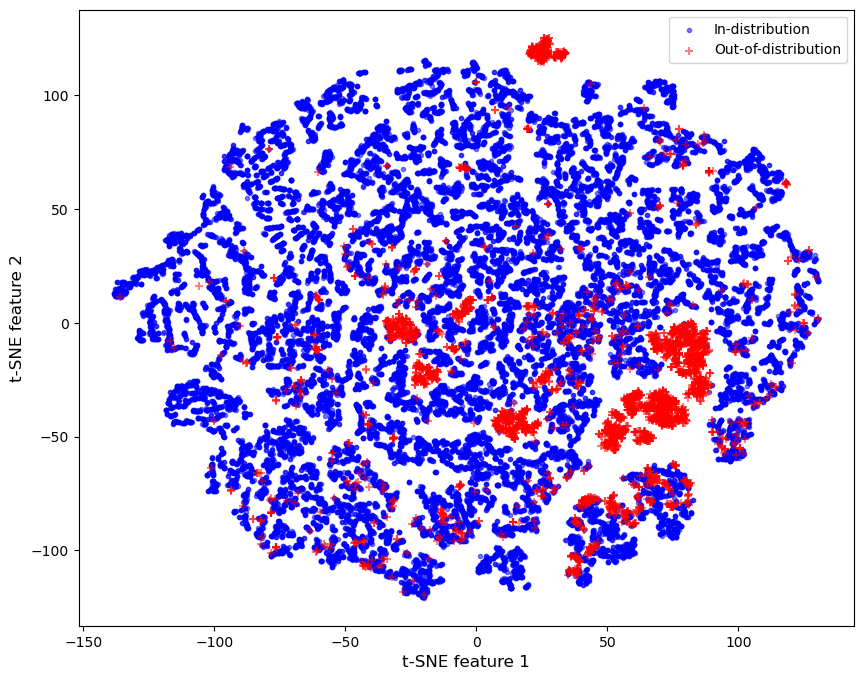

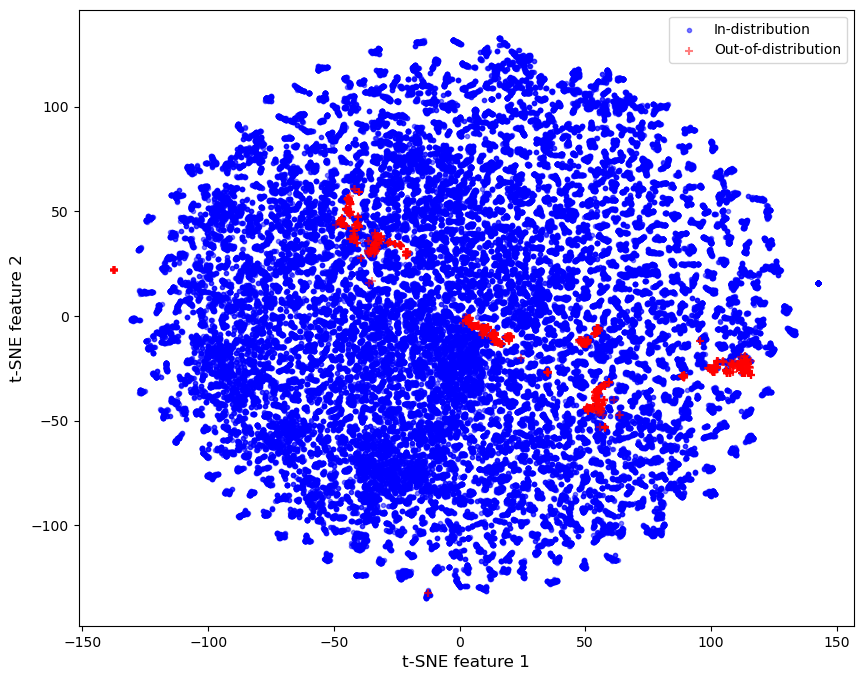

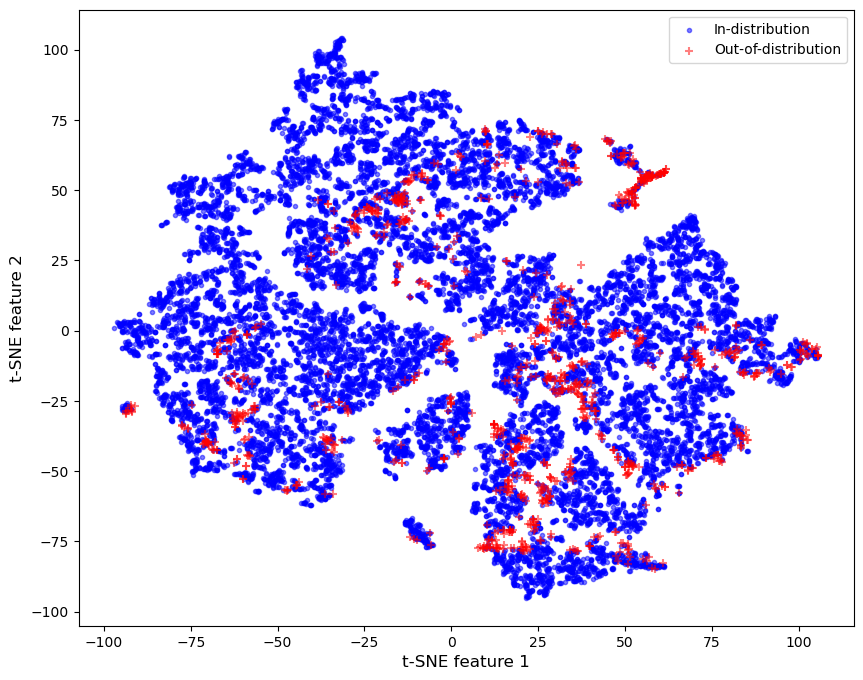

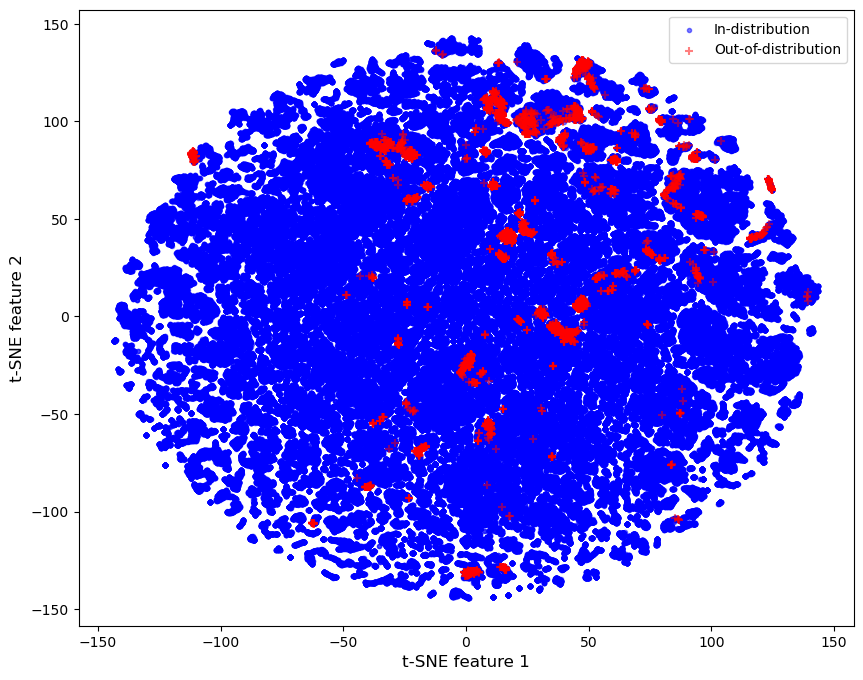

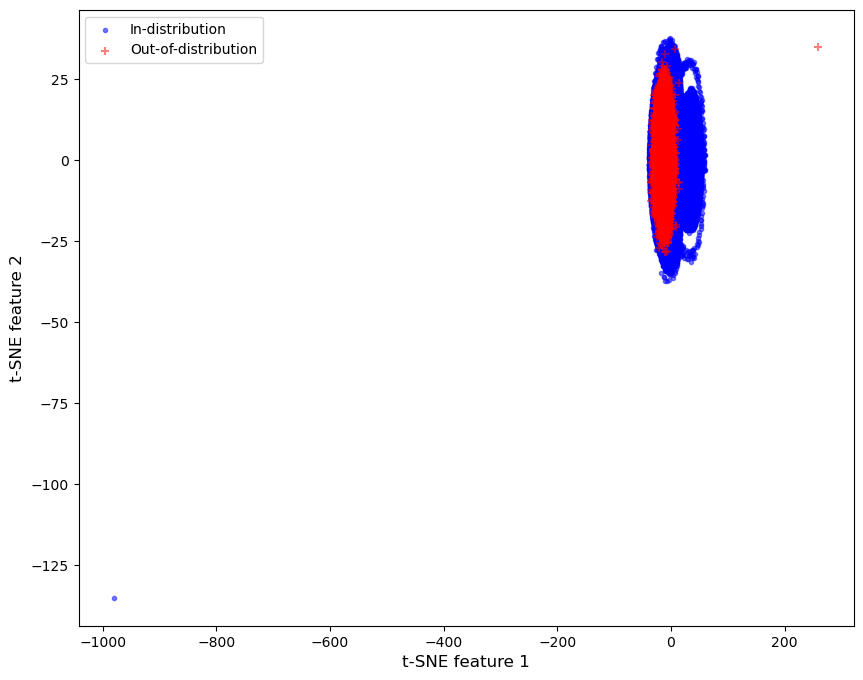

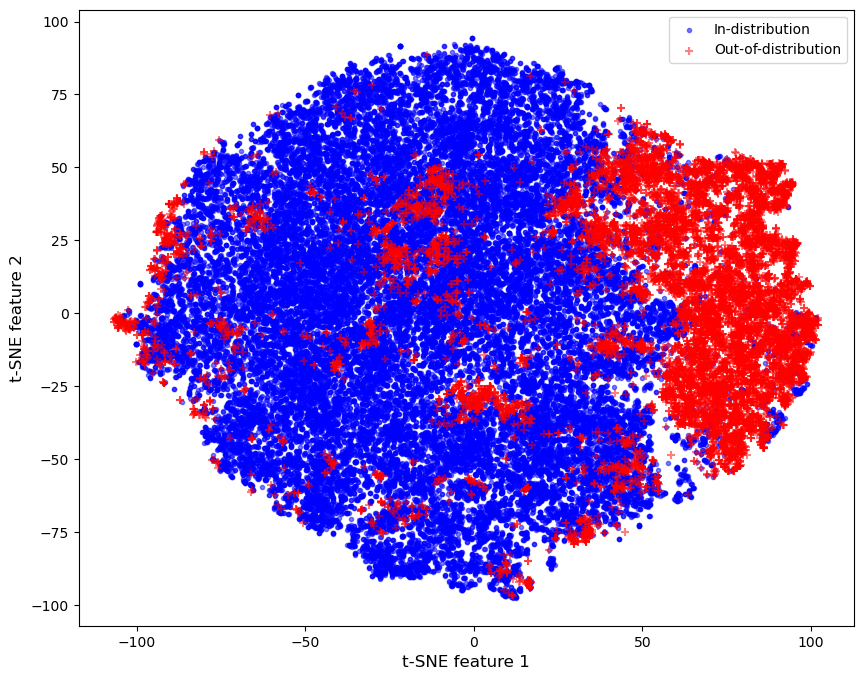

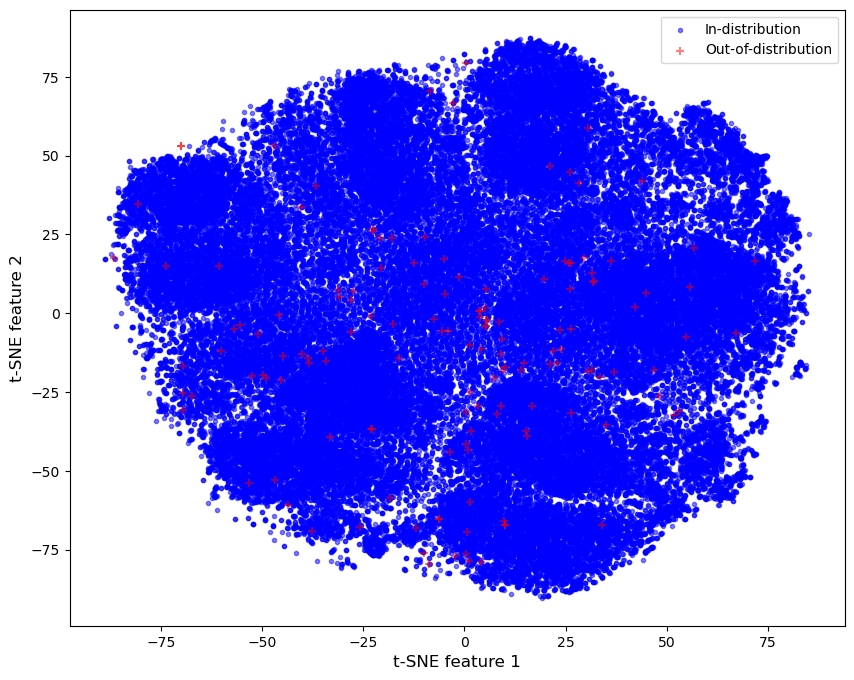

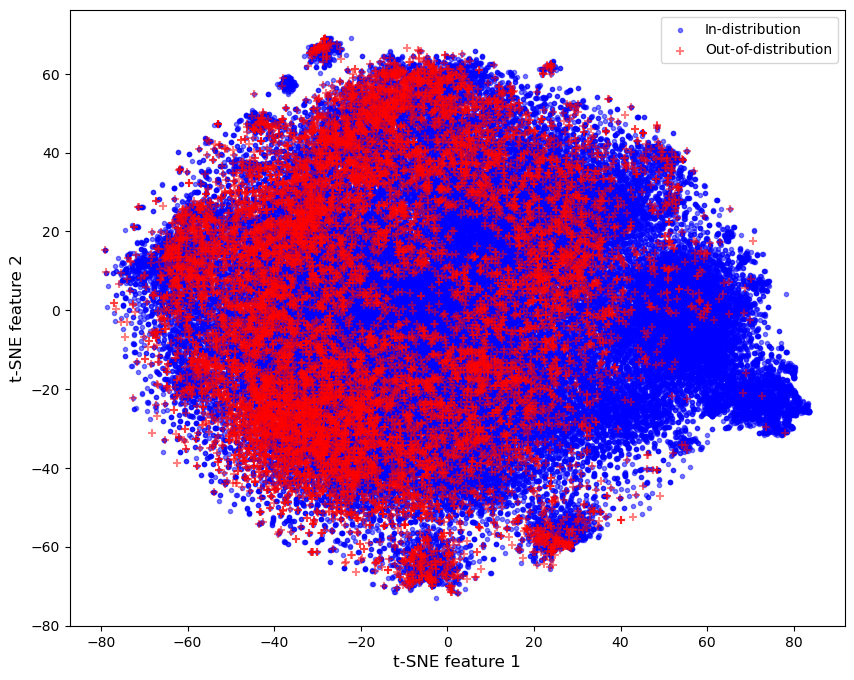

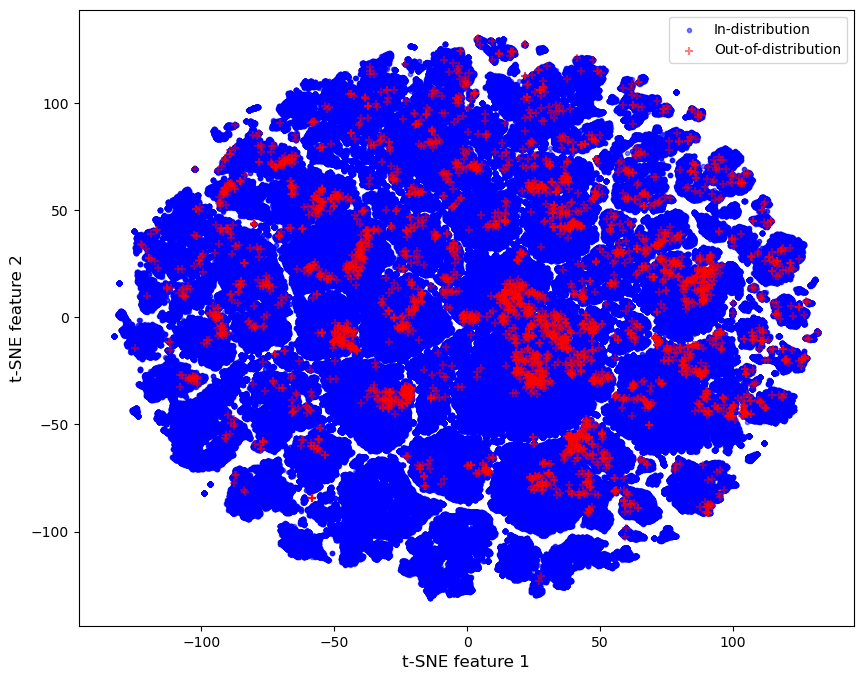

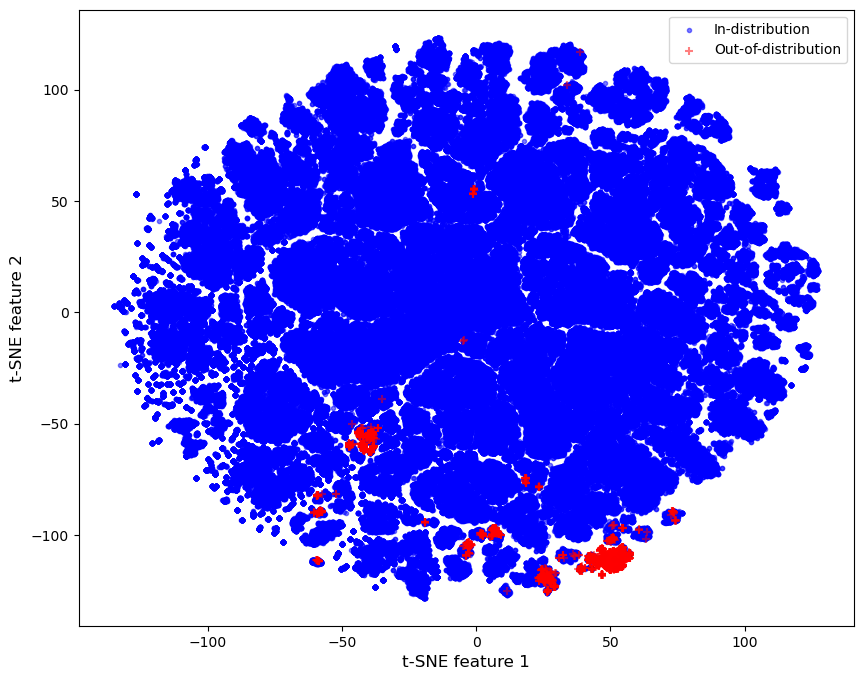

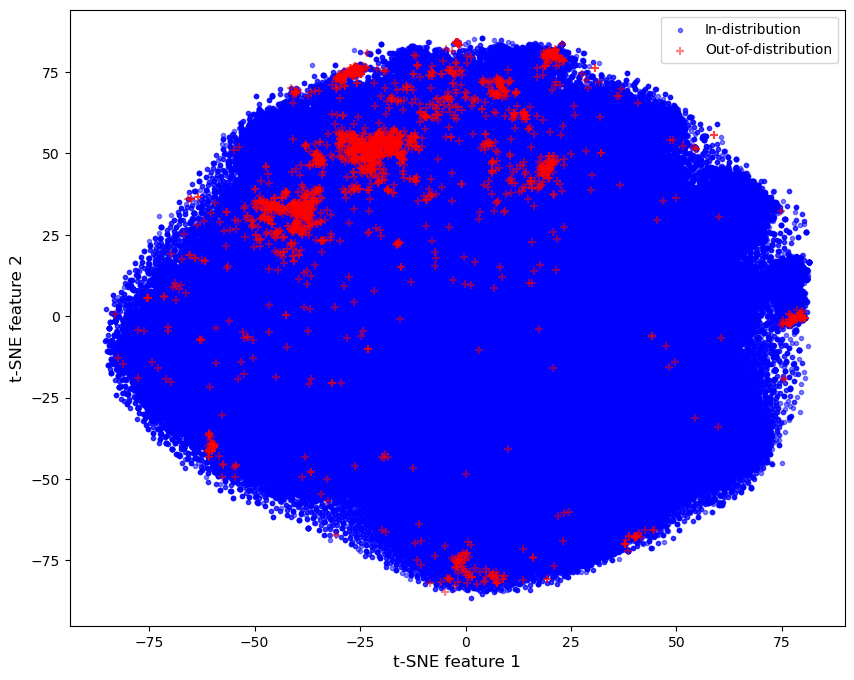

In [60]:
# datas = ['california_housing','adult','SensorlessDriveDiagnosis'][-2]
dirs = [
             'adult',
             'aloi',
             'california_housing',
             'covtype',
             'epsilon',
             'helena',
             'higgs_small',
             'jannis',
             'microsoft',
             'yahoo',
             'year'
            ]
for datas in dirs[:]:
    print(datas)
    xTrain = np.load('data/'+datas+'/N_train.npy')
    xTest = np.load('data/'+datas+'/N_test.npy')
    yTrain = np.load('data/'+datas+'/y_train.npy')
    yTest = np.load('data/'+datas+'/y_test.npy')
    yTrain[yTrain!=0] = 0 #inDist
    yTest[yTest!=1] = 1 #OutDist
    
    X = np.vstack((xTrain, xTest))
    labels = np.vstack((yTrain.reshape(-1,1), yTest.reshape(-1,1)))
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)
    
    y = labels.reshape(1,-1)[0]
    # Separate the results for in-distribution and OOD samples
    X_tsne_in = X_tsne[y == 0]
    X_tsne_ood = X_tsne[y == 1]
    
    # Plotting
    plt = pyplt
    plt.figure(figsize=(10, 8))
    plt.scatter(X_tsne_in[:, 0], X_tsne_in[:, 1], c='blue', label='In-distribution', alpha=0.5, marker='.')
    plt.scatter(X_tsne_ood[:, 0], X_tsne_ood[:, 1], c='red', label='Out-of-distribution', alpha=0.5, marker='+')
    
    # plt.title('t-SNE Visualization of High-Dimensional Data', fontsize=16)
    plt.xlabel('t-SNE feature 1', fontsize=12)
    plt.ylabel('t-SNE feature 2', fontsize=12)
    plt.legend(fontsize=10)
    
    plt.savefig('tsne_'+datas+'.png',dpi=400)
    plt = None
    # plt.tight_layout()
    # plt.show()
    
    # # Print some statistics
    # print(f"Shape of the original data: {X.shape}")
    # print(f"Number of in-distribution samples: {np.sum(y == 0)}")
    # print(f"Number of OOD samples: {np.sum(y == 1)}")